# 1. Assessor and analyst work

## 1.0. Rating and criteria

Please [open this document](https://static.googleusercontent.com/media/guidelines.raterhub.com/en//searchqualityevaluatorguidelines.pdf)
and study chapters 13.0-13.4. Your task will be to assess the organic answers of search engines given the same query.

## 1.1. Explore the page

For the following search engines:
- https://duckduckgo.com/
- https://www.bing.com/
- https://ya.ru/
- https://www.google.com/

Perform the same query: "**How to get from Kazan to Voronezh**".

Discuss with your TA the following:
1. Which elements you may identify at SERP? Ads, snippets, blends from other sources, ...?
2. Where are organic results? How many of them are there?

## 1.2. Rate the results of the search engine

If there are many of you in the group, assess all search engines, otherwise choose 1 or 2. There should be no less than 5 of your for each search engine. Use the scale from the handbook, use 0..4 numerical equivalents for `[FailsM, SM, MM, HM, FullyM]`. 

Compute:
- average relevance and standard deviation for each SERP element.
- [Fleiss kappa score](https://en.wikipedia.org/wiki/Fleiss%27_kappa#Worked_example) for your group. Use [this implementation](https://www.statsmodels.org/dev/generated/statsmodels.stats.inter_rater.fleiss_kappa.html).
- [Kendall rank coefficient](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient) for some pairs in your group. Use [this implementation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html).

Discuss numerical results. Did you agree on the relevance? Did you agree on the rank? What is the difference?

In [2]:
import numpy as np
# example input by users
my_data = np.array([4,4,4,4,4,4,4,3,3,3])
ranking_data = np.array([
    [2, 3, 3, 3, 2, 2, 1, 2, 1, 1], # assessor 1 relevance
    [4, 3, 3, 1, 2, 3, 3, 1, 3, 2], # 2
    [4, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [3, 4, 4, 2, 2, 2, 3, 3, 1, 1],
    [4, 4, 4, 4, 4, 4, 4, 3, 3, 3],
    [4, 3, 3, 3, 2, 2, 3, 2, 4, 3],
    [4, 4, 4, 4, 3, 3, 2, 3, 2, 2],
    [4, 4, 2, 4, 4, 3, 3, 2, 2, 4],
    [3, 1, 1, 4, 4, 2, 3, 0, 4, 4],
    [4, 4, 2, 4, 4, 3, 3, 2, 2, 0]
])

In [3]:
np.mean(ranking_data, axis=0)
np.std(ranking_data, axis=0)

array([0.66332496, 1.34164079, 1.28062485, 1.37477271, 1.26885775,
       1.0198039 , 1.11803399, 1.07703296, 1.2489996 , 1.41421356])

Averages ang standard deviations per item.

In [4]:
mum = np.average(ranking_data, axis=0)
dad = np.std(ranking_data, axis=0)
for i in range(10):
    print("%d relevance %.3f±%.2f" %( i, mum[i], dad[i]))

0 relevance 3.600±0.66
1 relevance 3.000±1.34
2 relevance 2.600±1.28
3 relevance 2.900±1.37
4 relevance 2.700±1.27
5 relevance 2.400±1.02
6 relevance 2.500±1.12
7 relevance 1.800±1.08
8 relevance 2.200±1.25
9 relevance 2.000±1.41


Fleiss kappa score

In [ ]:
!pip install statsmodels

In [5]:
from statsmodels.stats.inter_rater import aggregate_raters, fleiss_kappa

agreement_matrix = np.zeros(shape=(10, 5))

index = 0
for column in ranking_data.T:
    for el in column:
        agreement_matrix[index][el] += 1
    index+=1 

print(agreement_matrix)

fleiss_kappa(agreement_matrix)

[[0. 0. 1. 2. 7.]
 [1. 1. 0. 3. 5.]
 [1. 1. 2. 3. 3.]
 [1. 1. 1. 2. 5.]
 [1. 0. 4. 1. 4.]
 [1. 0. 4. 4. 1.]
 [1. 1. 1. 6. 1.]
 [2. 1. 4. 3. 0.]
 [1. 2. 3. 2. 2.]
 [2. 2. 2. 2. 2.]]


0.018494247852046005

Kendall tau score is pairwise. Compare one to another.

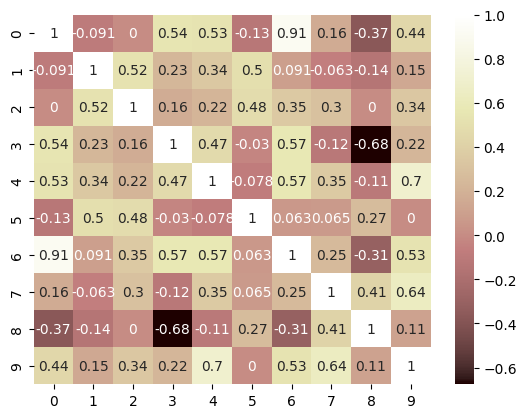

In [12]:
from scipy.stats import kendalltau
from seaborn import heatmap

# TODO your code here
kendalltau(ranking_data[0], ranking_data[1])

kendell_matrix = np.zeros(shape=(10,10))
for i in range(10):
    for j in range(10):
        kendell_matrix[i][j] = kendalltau(ranking_data[i], ranking_data[j])[0] 

# print(kendell_matrix)

hm = heatmap(kendell_matrix, cmap='pink', annot=True)

# 2. Engineer work

You will create a bucket of URLs which are relevant for the query **"free cloud git"**. Then you will automate the search procedure using https://serpapi.com/, or https://developers.google.com/custom-search/v1/overview, or whatever.

Then you will compute MRR@10 and Precision@10.

## 2.1. Build your bucket here

In [13]:
rel_bucket = [
    "github.com",
    "bitbucket.org",
    "gitlab.com",
    "gitpod.io",
    "sourceforge.net",
    "aws.amazon.com",
    "git-scm.com"
]

query = "free git cloud"

## 2.2. Relevance assessment

Write the code to check that the obtained document is relevant (True) or not (False).

In [14]:
def is_rel(resp_url):
    for link in rel_bucket:
        if link in resp_url:
            return True
    return False

In [15]:
import json
 
# Opening JSON file
with open('sample.json', 'r') as openfile:
 
    # Reading from json file
    js = json.load(openfile)
 
print(js)
print(type(js))

{'search_metadata': {'id': '63e9f82ad5a531b7621ac076', 'status': 'Success', 'json_endpoint': 'https://serpapi.com/searches/3ff401fc84e9a74c/63e9f82ad5a531b7621ac076.json', 'created_at': '2023-02-13 08:43:22 UTC', 'processed_at': '2023-02-13 08:43:22 UTC', 'google_url': 'https://www.google.com/search?q=free+git+cloud&oq=free+git+cloud&gl=us&sourceid=chrome&ie=UTF-8', 'raw_html_file': 'https://serpapi.com/searches/3ff401fc84e9a74c/63e9f82ad5a531b7621ac076.html', 'total_time_taken': 5.76}, 'search_parameters': {'engine': 'google', 'q': 'free git cloud', 'google_domain': 'google.com', 'hl': 'en', 'gl': 'us', 'device': 'desktop'}, 'search_information': {'organic_results_state': 'Results for exact spelling', 'query_displayed': 'free git cloud', 'total_results': 43800000, 'time_taken_displayed': 0.39, 'menu_items': [{'position': 1, 'title': 'All'}, {'position': 2, 'title': 'Images', 'link': 'https://www.google.com/search?q=free+git+cloud&ucbcb=1&gl=us&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiY36

## 2.3. Automation

Get search results from the automation tool you use.

In [16]:
rels = []
for result in js["organic_results"]:
    print(result['position'], result['title'])
    print(result['link'])
    print(is_rel(result['link']))
    rels.append(int(is_rel(result['link'])))
    print()

1 6 places to host your git repository - Opensource.com
https://opensource.com/article/18/8/github-alternatives
False

2 Bitbucket | Git solution for teams using Jira
https://bitbucket.org/product
True

3 Gitpod: Always ready to code.
https://www.gitpod.io/
True

4 GitLab: The DevSecOps Platform
https://about.gitlab.com/
True

5 GitHub: Let's build from here · GitHub
https://github.com/
True

6 14 Git Hosting Services Compared | Tower Blog
https://www.git-tower.com/blog/git-hosting-services-compared/
False

7 Top GitHub Alternatives to Host Your Open Source Projects
https://itsfoss.com/github-alternatives/
False

8 Git
https://git-scm.com/
True

9 Top 10 best Git hosting solutions and services in 2021
https://www.devopsschool.com/blog/top-5-git-hosting-solutions/
False

10 15 Best Github Alternatives in 2023 - Guru99
https://www.guru99.com/github-alternative.html
False



In [75]:
rels

[0, 1, 0, 1, 1, 0, 0, 1, 0, 0]

## 2.4. MRR

Compute MRR:

In [ ]:
def mrr(list_of_lists, k=10):
    # todo your code here
    return 0.

In [ ]:
mrr([rels]) # BTW, why do I wrap the list into additional brackets? :)

## 2.5. Precision
Compute mean precision:

In [ ]:
def mp(list_of_lists, k=10):
    # todo your code here
    return 0.

In [ ]:
mp([rels])